# ==========================================
# MACHINE LEARNING - FCUP
# Módulo: Análise Exploratória de Dados (AED)
# ==========================================

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [3]:
# Configurações visuais
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# ==========================================
# PARTE 1: EXEMPLO GUIADO (California Housing)
# ==========================================
# Contexto: Dados do censo de 1990 da Califórnia.
# Objetivo: Entender o que influencia o preço das casas.

In [4]:
print("--- CARREGANDO DADOS (California Housing) ---")
df = pd.read_csv("housing.csv")
df.head()

--- CARREGANDO DADOS (California Housing) ---


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# 1. Caracterização Inicial
# ------------------------------------------
print("\n1. Visualização das primeiras linhas:")
display(df.head())

print("\n2. Informações dos Tipos de Dados (Metadados):")
# Note: Todos são float64 (Quantitativos Razão/Intervalar)
display(df.info())

print("\n3. Estatísticas Descritivas (Centralidade e Dispersão):")
# count, mean (centralidade), std (dispersão), min/max (amplitude), quartis (distribuição)
display(df.describe())


1. Visualização das primeiras linhas:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



2. Informações dos Tipos de Dados (Metadados):
<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


None


3. Estatísticas Descritivas (Centralidade e Dispersão):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# 2. Análise Univariada (Uma variável por vez)
# ------------------------------------------
# Vamos analisar a variável alvo: 'MedHouseVal' (Valor Mediano da Casa)

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 0, 'Valor Mediano (x $100.000)')

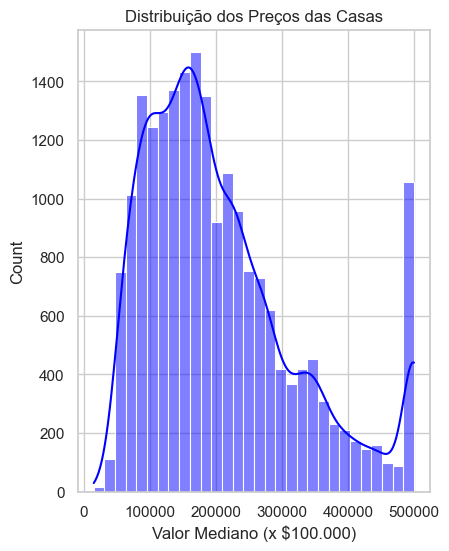

In [6]:
# Histograma com KDE (Kernel Density Estimate) - Para ver a Distribuição
plt.subplot(1, 2, 1)
sns.histplot(df['median_house_value'], kde=True, bins=30, color='blue')
plt.title('Distribuição dos Preços das Casas')
plt.xlabel('Valor Mediano (x $100.000)')

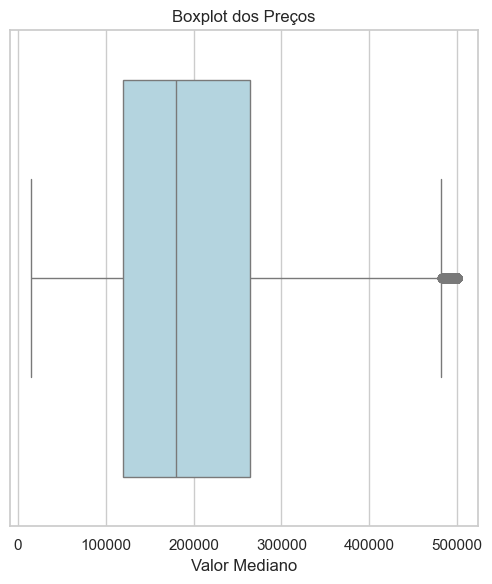

Assimetria (Skewness): 0.98
Nota: A cauda à direita indica que há poucas casas muito caras puxando a média para cima.


In [7]:
# Boxplot - Para ver Centralidade e Outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['median_house_value'], color='lightblue')
plt.title('Boxplot dos Preços')
plt.xlabel('Valor Mediano')
plt.tight_layout()
plt.show()

print(f"Assimetria (Skewness): {df['median_house_value'].skew():.2f}")
print("Nota: A cauda à direita indica que há poucas casas muito caras puxando a média para cima.")

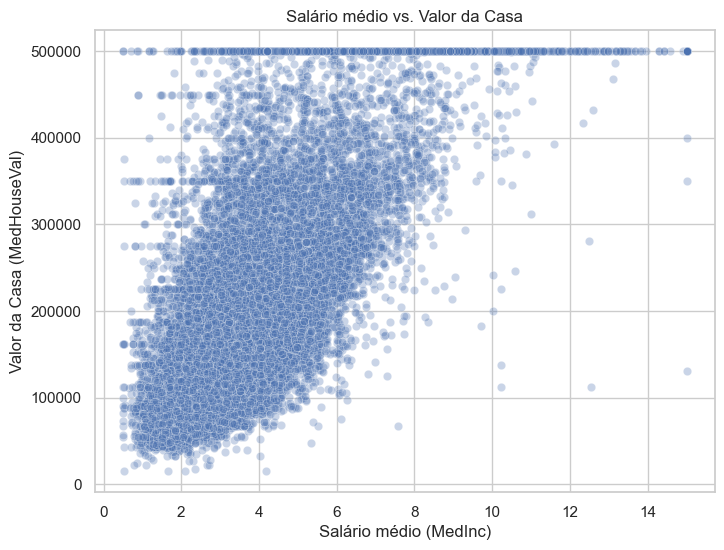

In [8]:
# 3. Análise Multivariada (Relação entre variáveis)
# ------------------------------------------
# Pergunta: O salário médio (MedInc) influencia o valor da casa (MedHouseVal)?

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.3)
plt.title('Salário médio vs. Valor da Casa')
plt.xlabel('Salário médio (MedInc)')
plt.ylabel('Valor da Casa (MedHouseVal)')
plt.show()

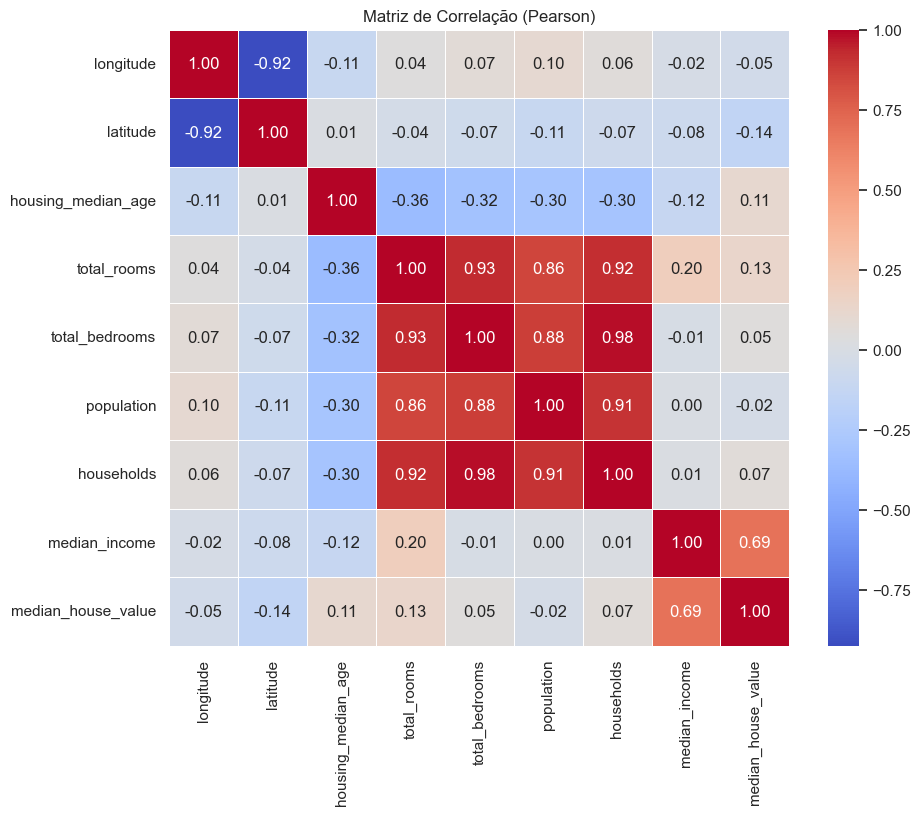

Interpretação: Note a forte correlação positiva (0.69) entre MedInc e MedHouseVal.


In [ ]:
# Matriz de Correlação
# Vamos ver a correlação entre todas as variáveis numéricas
corr_matrix = df.corr(method='pearson', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação (Pearson)')
plt.show()

print("Interpretação: Note a forte correlação positiva (0.69) entre MedInc e MedHouseVal.")

In [10]:
# ==========================================================
# 1. PEARSON vs SPEARMAN (Dados Numéricos)
# ==========================================================
print("Comparando Pearson (Linear) com Spearman (Rank/Ordem)")

# Pearson (Padrão)
corr_pearson = df.corr(method='pearson', numeric_only=True)

# Spearman (Baseado em Rank - Bom para não-linearidades e outliers)
corr_spearman = df.corr(method='spearman', numeric_only=True)

# Visualizando a diferença para uma relação específica
# Vamos ver a relação entre Salário (MedInc) e Preço (MedHouseVal)
print(f"Correlação Pearson: {corr_pearson.loc['median_income', 'median_house_value']:.4f}")
print(f"Correlação Spearman: {corr_spearman.loc['median_income', 'median_house_value']:.4f}")

print("\nNota: Se Spearman for muito diferente de Pearson, seus dados provavelmente têm outliers ou a relação não é uma linha reta perfeita.")

Comparando Pearson (Linear) com Spearman (Rank/Ordem)
Correlação Pearson: 0.6881
Correlação Spearman: 0.6768

Nota: Se Spearman for muito diferente de Pearson, seus dados provavelmente têm outliers ou a relação não é uma linha reta perfeita.




Tabela de Contingência (Classe vs Sobrevivência):


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


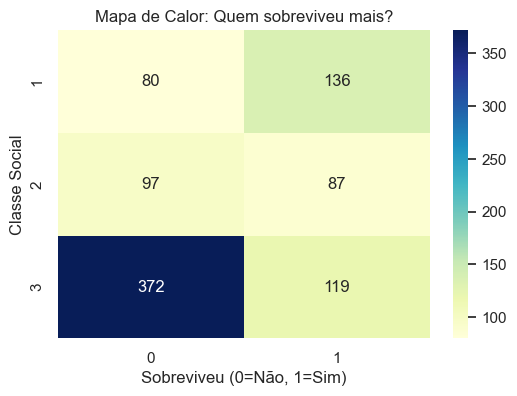

Interpretação: O mapa mostra claramente que na 1ª Classe (First), o número de sobreviventes (1) é maior que o de não sobreviventes (0), invertendo-se na 3ª classe.


In [12]:
# ==========================================================
# 2. DADOS CATEGÓRICOS (Para Letras e Ciências Sociais)
# ==========================================================
# Pearson falha com texto. Como ver relação entre duas categorias?
# Exemplo: Existe relação entre "Sobreviver" e "Classe" no Titanic?

df_titanic = pd.read_csv("Titanic-Dataset.csv")

# Usamos Tabela de Contingência (Crosstab) em vez de .corr()
tabela = pd.crosstab(df_titanic['Pclass'], df_titanic['Survived'])

print("\n\nTabela de Contingência (Classe vs Sobrevivência):")
display(tabela)

# Visualizando com Heatmap (Mais intuitivo que o número puro)
plt.figure(figsize=(6, 4))
sns.heatmap(tabela, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de Calor: Quem sobreviveu mais?')
plt.xlabel('Sobreviveu (0=Não, 1=Sim)')
plt.ylabel('Classe Social')
plt.show()

print("Interpretação: O mapa mostra claramente que na 1ª Classe (First), o número de sobreviventes (1) é maior que o de não sobreviventes (0), invertendo-se na 3ª classe.")